# Sharia Sentiment Notebook 

#### This notebook aims to answer the PIR, *What is the militant threat groups intent towards the MFO?* and look for trends and reporting on *2C- Perceived Implementation of Sharia Law.*

All data was exported from Recorded Future using the query "Sharia", (English), "الشريعة" (Farsi) or "شرع" (Persian). 
The date range for this data is 5 years, March 2017 - March 2021. 
I used another notebook to translate both Arabic and Perisan translations since RF did not export translated text. 

The limitations for this notebook are the data-sets pulled from Recorded Future may not be all encompassing of opinion surrounding "Sharia". This notebook is a relection of what I was able to pull using the RF tool, the translation of text via Google's Translate API, and the VADER pre-trained model's scoring system. 

Key findings are as follows:

Below plots show Sharia (English) sentiment from Recorded Future from Feb 2017 - March 2021. Overall sentiment is neutral, slightly positive leaning

In [292]:
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

In [293]:
img1 = plt.imread('/home/1243621751/examplenotebooks_working/Sharia_Teri/sentiment_images/English Sentiment overall.jpg')
img2 = plt.imread('/home/1243621751/examplenotebooks_working/Sharia_Teri/sentiment_images/English sentiment source.jpg')

NUM_ROWS = 1
IMGs_IN_ROW = 2
f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(20,6))

ax[0].imshow(img1)
ax[1].imshow(img2)

ax[0].set_title('overall score')
ax[1].set_title('score by source')

title = 'English Sentiment of Sharia'
f.suptitle(title, fontsize=16)
plt.tight_layout()
plt.show()
hide_toggle()

PermissionError: [Errno 13] Permission denied: '/home/1243621751/examplenotebooks_working/Sharia_Teri/sentiment_images/English Sentiment overall.jpg'

The below graphs show English sentiment postive (left) and negative (right) scores. As you can see, there are larger clusters close to the turn of the new year, each year, with large clusters specifically just before 2020 and 2021.

In [ ]:
img1 = plt.imread('/home/1243621751/examplenotebooks_working/Sharia_Teri/sentiment_images/Vader positive English.jpg')
img2 = plt.imread('/home/1243621751/examplenotebooks_working/Sharia_Teri/sentiment_images/Vader negative English.jpg')

NUM_ROWS = 1
IMGs_IN_ROW = 2
f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(30,10))

ax[0].imshow(img1)
ax[1].imshow(img2)

ax[0].set_title('overall score')
ax[1].set_title('score by source')

title = 'English sentiment using VADER pre-trained model'
f.suptitle(title, fontsize=20)
plt.tight_layout()
plt.show()
hide_toggle()

In [ ]:
#import notebook packages
import json
import pandas as pd
import numpy as np
import textwrap
import statistics

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import networkx as nx
import plotly.express as px

from itertools import combinations

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from IPython.display import HTML
import random

### Load English Data

In [368]:
instances = pd.read_json('/home/1501273330/examplenotebooks/rf_export_events_involving_shariah/instances.json', lines=True, orient='records')
entities = pd.read_json('/home/1501273330/examplenotebooks/rf_export_events_involving_shariah/entities.json', lines=True, orient='records')

In [369]:
events = pd.json_normalize(instances['attributes'])
events.head()

document_title document_external_id  \
0  @Abbagallah51 @Rahma_sadau Those who hate #Sha...  1326271664494153731   
1  @Idreeskhankhatt @iihtishamm @OfficialDGISPR A...  1100583302174519297   
2  #Malaysia: Trading #opportunity for Digi with ...   985816860435402752   
3  Darhi ki Sunnat!!\n@islahenafs \n\n#sunnah #is...  1224282116680232960   
4  #Shariah #Islamic #Finance #FinTech #Mudaraba ...  1337096937036713989   

    canonic_id  fragment_count    document precision language document_id  \
0  FxFDrYnm6S_             0.0  doc:gBumHw        ms      eng      gBumHw   
1  GSAWQSpCQiz             0.0  doc:ZPyYob        ms      eng      ZPyYob   
2   LycTpYwcwb             0.0  doc:VylSCe        ms      eng      VylSCe   
3  CUmFtyZ-Idt             0.0  doc:csus9h        ms      eng      csus9h   
4  CedgGTIR2c0             0.0  doc:gY6uGt        ms      eng      gY6uGt   

         original_published function  ... person_quotation_indicator  quote  \
0  2020-11-10T21:13:00.000Z       id  ...                        NaN    NaN   
1  2019-02-27T02:28:01.000Z       id  ...                        NaN    NaN   
2                       NaN       id  ...                        NaN    NaN   
3                       NaN       id  ...                        NaN    NaN   
4  2020-12-10T18:08:46.000Z       id  ...                        NaN    NaN   

  quote_entities sentiments.nabu_terrorincident_eng_v0  \
0            NaN                                   NaN   
1            NaN                                   NaN   
2            NaN                                   NaN   
3            NaN                                   NaN   
4            NaN                                   NaN   

  sentiments.classifier_terrorincident_fra targets relationship_indicator  \
0                                      NaN     NaN                    NaN   
1                                      NaN     NaN                    NaN   
2                                      NaN     NaN                    NaN   
3                                      NaN     NaN                    NaN   
4                                      NaN     NaN                    NaN   

   partner2 partner1 sentiments.classifier_terrorincident_fas  
0       NaN      NaN                                      NaN  
1       NaN      NaN                                      NaN  
2       NaN      NaN                                      NaN  
3       NaN      NaN                                      NaN  
4       NaN      NaN                                      NaN  

[5 rows x 82 columns]

## Data Info

Here is a list of the 82 attribute rows in "Event". We can see that Recorded Future already calcualtes a sentiment score, even classifying as violence, terror incident, or terrorist attack.

In [370]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 82 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   document_title                                    1219 non-null   object 
 1   document_external_id                              1200 non-null   object 
 2   canonic_id                                        1222 non-null   object 
 3   fragment_count                                    1209 non-null   float64
 4   document                                          1222 non-null   object 
 5   precision                                         1222 non-null   object 
 6   language                                          1215 non-null   object 
 7   document_id                                       1222 non-null   object 
 8   original_published                                650 non-null    object 
 9   function           

#### Using the RF data-set, look for any duplicate titles and drop duplicate data-points.

In [371]:
# Match Source ID to Source Entity Name
events = events.drop_duplicates(subset=['document_title'])
events['source'] = events['document_source'].apply(
    lambda x: entities[entities['id'] == x]['attributes'].values[0]['name'] if any(entities['id'] == x) else np.nan)

In [372]:
events['show_text'] = events['event_fragment'].apply(lambda txt: '<br>'.join(textwrap.wrap(txt, width=100)))

#### Show all English data-points using a histogram. Each data-point is color coded by source. 

In [373]:
#BRIAN
fig = px.histogram(events, x='published', color='source', marginal="rug", hover_name = 'document_id', hover_data= ['show_text', 'published', 'source'])
#fig.update_traces(marker_size=10)
#fig.update_layout (width=1000, height=1000)
fig.show()

#### In the above figure, we are seeing spikes in count of Twitter data-points. The two highest peaks are March-May 2017 (81) and Nov 2019-Jan2020 (70).

In [374]:
#BRIAN
fig = px.strip(events, x='published', y='source', color="source", hover_name = 'document_id', hover_data= ['show_text', 'published', 'source'])
#fig.update_traces(marker_size=10)
fig.update_layout(showlegend=False, yaxis = dict( tickfont = dict(size=8)))
fig.show()

#### In the figure above, it is the same data, however instead of count, we are looking at source and publishing. As you can see, most of our English data-set originates from Twitter. 

## Conduct Sentiment Analysis
This analysis is using Recorded Future's sentiment scoring

#### Plot *NEGATIVE* scores only.

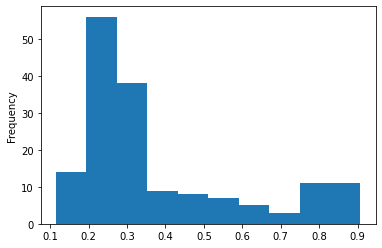

In [375]:
events['sentiments.general_negative'].plot.hist()
plt.show()

In the figures above and below, we see that we have a generally neutral score. Out of 162 data-points, we have a mean of 0.390261 with our outliners of 0.115385 and 0.907407 .


In [376]:
events['sentiments.general_negative'].describe()

count    162.000000
mean       0.390261
std        0.218192
min        0.115385
25%        0.250000
50%        0.300000
75%        0.473684
max        0.907407
Name: sentiments.general_negative, dtype: float64

# Box and whisker plot—also called a box plot

Is used to study the distributional characteristics of a group of scores as well as the level of the scores.

Displays the five-number summary of a set of data. The five-number summary is the minimum (or lower whisker), first quartile, median, third quartile, and maximum (or upper whisker).

In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.


*remove quartile/whisker. box shows margority of data. median is center , if falls outside of lines = outlier. 
look up leaf plot - stem and leaf plot ? 
bar chart with confidence intervals

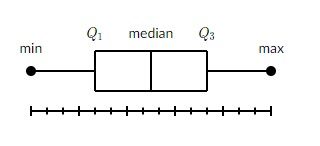

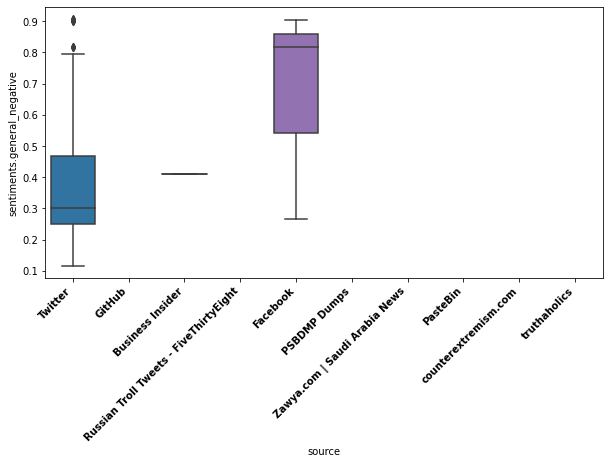

In [377]:
#change to 
plt.figure(figsize=(10,5))
ax = sns.boxplot(x ='source', y= 'sentiments.general_negative', data=events)
plt.setp(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right', 
    fontweight='heavy'
);


In the figure above, we see that Twitter and Facebook are the primary sources of data when looking at only negative sentiment. 
Facebook posts tend to be more negative, with a mean around 0.8 and Twitter posts leaning slightly negative, but there are strong outliers and has a mean of 0.3.

#### Plot *POSITIVE* scores only.

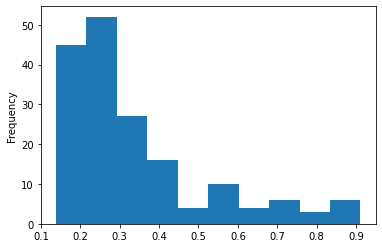

In [378]:
events['sentiments.general_positive'].plot.hist()
plt.show()

In the figure above and below, again, we see that we have a generally neutral score. Out of 173 data-points, we have a average of .34009 with our outliners of 0.138462 and 0.911111 .

In [379]:
events['sentiments.general_positive'].describe()

count    173.000000
mean       0.340009
std        0.185747
min        0.138462
25%        0.214286
50%        0.272727
75%        0.391304
max        0.911111
Name: sentiments.general_positive, dtype: float64

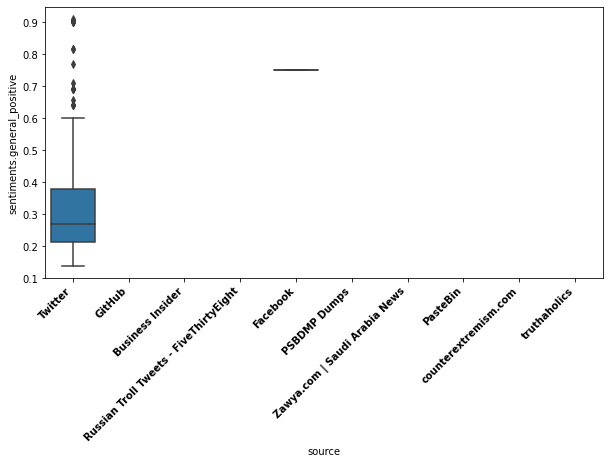

In [380]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x ='source', y= 'sentiments.general_positive', data=events)
plt.setp(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right', 
    fontweight='heavy'
);

In the figure above, we see that in our positive English data, Twitter is the primary data source leaning slightly positive but shows muliple outliers beyond the upper whisker.

## Sentiment Analysis using the VADER model.

Developed in 2014, VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-trained model that uses rule-based values tuned to sentiments from social media. It evaluates the text of a message and gives you an assessment of not just positive and negative, but the intensity of that emotion as well.

It uses a dictionary of terms that it can evaluate. From the GitHub repository this includes examples like:
- Negations - a modifier that reverses the meaning of a phrase ("not great").
- Contractions - negations, but more complex ("wasn’t great").
- Punctuation - increased intensity ("It’s great!!!").
- Slang - variations of slang words such as "kinda", "sux", or "hella".
- It's even able to understand acronyms ("lol") and emoji (❤).

The scoring is a ratio of the proportion for text that falls into each category. Language is not black and white, so it is rare to see a completely positive or a completely negative score. Since this model has been pre-trained for social media, it should be very applicable to comments made by users on Reddit.

The results of polarity_scores gives us numerical values for use of negative, neutral, and positive word choice. The compound value reflects the overall sentiment ranging from -1 being very negative and +1 being very positive.

You can find more about the NLTK sentiment usage from the pydoc page: https://www.nltk.org/api/nltk.sentiment.html.

#### Using the event_text column, interate over the rows and calculate a score using the VADER pre-trained model. 

In [381]:
events['event_text']

0       @Abbagallah51 @Rahma_sadau Those who hate #Sha...
1       @Idreeskhankhatt @iihtishamm @OfficialDGISPR A...
2       #Malaysia: Trading #opportunity for Digi with ...
3       Darhi ki Sunnat!! @islahenafs #sunnah #islam #...
4       #shariah #islamic #finance #fintech #mudaraba ...
                              ...                        
1215    @nsssharma @sankrant @rifatjawaid @netanyahu #...
1216    Islamic banking set to grow in Africa https://...
1217    @OpIndia_com According to #shariah nothing wro...
1218    Our team of experts offers a concierge approac...
1219    @wasimakramlive #kartarpurcorridorforpeace #gu...
Name: event_text, Length: 1073, dtype: object

In [382]:
analyzer = SentimentIntensityAnalyzer()
events['scores'] = events['event_text'].apply(lambda x: analyzer.polarity_scores(x))

In [383]:
events['scores']

0       {'neg': 0.078, 'neu': 0.802, 'pos': 0.12, 'com...
1       {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...
2       {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'comp...
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
1215    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1216    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1217    {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...
1218    {'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'comp...
1219    {'neg': 0.148, 'neu': 0.74, 'pos': 0.113, 'com...
Name: scores, Length: 1073, dtype: object

In [384]:
df = pd.DataFrame(list(events['scores']))
df

neg    neu    pos  compound
0     0.078  0.802  0.120    0.2500
1     0.000  0.867  0.133    0.3182
2     0.000  0.823  0.177    0.4215
3     0.000  1.000  0.000    0.0000
4     0.000  1.000  0.000    0.0000
...     ...    ...    ...       ...
1068  0.000  1.000  0.000    0.0000
1069  0.000  1.000  0.000    0.0000
1070  0.000  0.817  0.183    0.8472
1071  0.000  0.733  0.267    0.9001
1072  0.148  0.740  0.113   -0.2732

[1073 rows x 4 columns]

#### Here we can specify a particular row and see it's score.


In [385]:
events.loc[585, 'scores']

{'neg': 0.11, 'neu': 0.574, 'pos': 0.316, 'compound': 0.8225}

### Let's look at all the scores on a bar graph.

In [386]:
events['VaderSentiment'] = events['scores'].apply(lambda x: x['compound'])
events['VaderSentiment.positive'] = events['scores'].apply(lambda x: x['pos'])
events['VaderSentiment.negative'] = events['scores'].apply(lambda x: x['neg'])


### Overall view of all English data using VADER pre-trained model

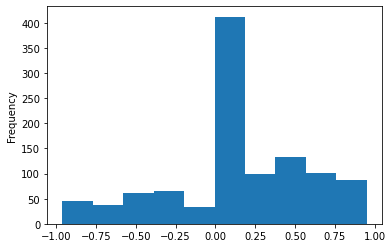

In [387]:
events['VaderSentiment'].plot.hist()
plt.show()

In the histogram above, we see again, generally neutral but leaning towards positive sentiment.

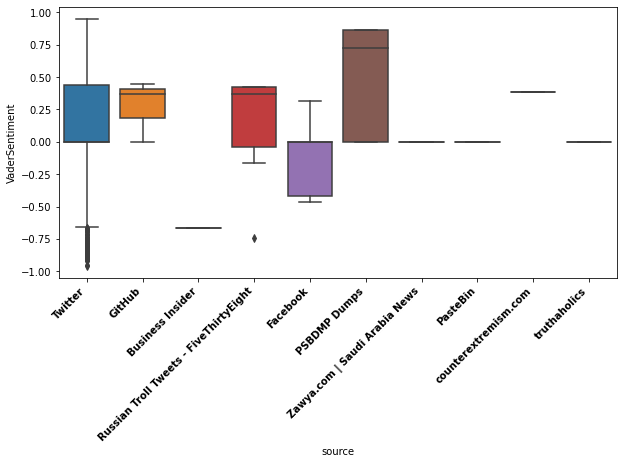

In [388]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x ='source', y= 'VaderSentiment', data=events)
plt.setp(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right', 
    fontweight='heavy'
);

In the figure above, all English data-points are plotted by source and overall sentiment using the Vader pre-trained model. Overall, we can see that the English data-set has generally nuetral with a slightly positive sentiment. Users on Twitter are more active with higher outliers as shown by points beyond the lower wisker.

### Now I want to focus in on my *positive* outliers. An outlier is a data point that differs significantly from other observations.

In [389]:
events[events['VaderSentiment'] > .4]['event_fragment']

2       #Malaysia: Trading #opportunity for Digi with ...
7       #Malaysia's #takaful segment will benefit from...
9       #SDG financing gap in Islamic countries an 'op...
12      IBFIM Public Programmes - January 2020! For de...
18      Dear Adab Solutions community! https://t.co/NH...
                              ...                        
1204    Clashes btw Danes & Moslems in the 2nd largest...
1211    For more information regarding Sarwari Qadri O...
1212    @insafpk @aamirliaquat @smqureshipti #Islam #s...
1217    @OpIndia_com According to #shariah nothing wro...
1218    Our team of experts offers a concierge approac...
Name: event_fragment, Length: 299, dtype: object

There are 299 positive outliers above. 

In [390]:
events[events['VaderSentiment'] > .4]['event_fragment'].count()

299

#### Here you can look at the sentiment of individual data-points by calling the number assigned in the first column. Text is *event_fragment*. 

In [391]:
#df.loc to access a group of rows and columns by label(s) or a boolean array. 
ind = 2
print('{}\nRFNegative: {}\nRFPositive: {}\nVaderSentiment: {}\nVaderPos: {}\nVaderNeg: {}'.format(events.loc[ind, 'event_fragment'] , 
                                                                      events.loc[ind, 'sentiments.general_negative'],
                                                                      events.loc[ind, 'sentiments.general_positive'], 
                                                                      events.loc[ind, 'VaderSentiment'], 
                                                                      events.loc[ind, 'VaderSentiment.positive'],
                                                                      events.loc[ind, 'VaderSentiment.negative']))

#Malaysia: Trading #opportunity for Digi with potential #Shariah list reinstatement: PublicInvest https://t.co/Hbmy8IdkUd via @SalaamGateway.
RFNegative: nan
RFPositive: 0.33333333333333304
VaderSentiment: 0.4215
VaderPos: 0.177
VaderNeg: 0.0


#### Looking closely, we can see what Recorded Future is saying the positive and negative sentiments scores are and then what VADER is saying. You can see that there is a difference in the scoring.

### Now I want to focus in on my *negative* outliers. 

In [392]:
events[events['VaderSentiment'] < -.5]['event_fragment']

27      #SoniaSena won't question #Church conversion u...
30      Some people are ashamed & afraid that kuffar w...
34      @WMPolice It's a shame you dont have real dete...
54      International coalition targets Indonesia's an...
55      All of these fancy summits, protests but no on...
                              ...                        
1132    Now here is a REAL #woman fighting against #op...
1148    @zlando #shariah for #britain and all others. ...
1162    #satanism #climatechange #agenda2030 #shariah ...
1201    #Sharia #Shariah #ISIS #ISIL #ishra Religion o...
1205    @IAmErAijaz Bhai pls ban Tripple talaq, it's r...
Name: event_fragment, Length: 102, dtype: object

There are 102 negative outliers above. 

In [393]:
events[events['VaderSentiment'] < -.5]['event_fragment'].count()

102

#### To look at a specific data-point, change number after ind =

In [394]:
ind = 30
print('{}\nRFNegative: {}\nRFPositive: {}\nVaderSentiment: {}\nVaderPos: {}\nVaderNeg: {}'.format(events.loc[ind, 'event_fragment'] , 
                                                                      events.loc[ind, 'sentiments.general_negative'],
                                                                      events.loc[ind, 'sentiments.general_positive'], 
                                                                      events.loc[ind, 'VaderSentiment'], 
                                                                      events.loc[ind, 'VaderSentiment.positive'],
                                                                      events.loc[ind, 'VaderSentiment.negative']))

Some people are ashamed & afraid that kuffar will call us terrorists, they are ashamed to say that our struggle is for implementation of #shariah . But we take pride in calling ourselves terrorists,
RFNegative: 0.90079365079365
RFPositive: nan
VaderSentiment: -0.8705
VaderPos: 0.069
VaderNeg: 0.31


#### Again, there is a difference in the scoring.

## Visualize the Data

#### Plot all data-points on a scatter plot

In [395]:
#BRIAN
fig = px.scatter(events, x='published', y='VaderSentiment', color="source", hover_name = 'document_id', hover_data= ['show_text', 'published', 'source'])
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(showlegend=True, yaxis = dict( tickfont = dict(size=8)))
fig.show()

Above we can see that most of the data-points are neutral but we start to see some clustering in specific areas.

### Let's take a look at only our outliers

In [396]:
fig = px.scatter(events[events['VaderSentiment'].abs() > .5], x='published', y='VaderSentiment', color="source", 
                hover_name = 'document_id', hover_data= ['show_text', 'published', 'source'])
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(showlegend=True, yaxis = dict( tickfont = dict(size=8)))
fig.show()

In the scatterplot above, we are taking out the "neutral noise" and can clearly see clusters close to the new year.

In [397]:
fig = px.scatter(events, x='published', y='VaderSentiment.positive', color="source", 
                hover_name = 'document_id', hover_data= ['show_text', 'published', 'source'])
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(showlegend=True, yaxis = dict( tickfont = dict(size=8)))
fig.show()

In the scatterplot above, we are looking only at positive data-points.  We clearly see clustering before Sept-Nov 2019.

In [398]:
fig = px.scatter(events, x='published', y='VaderSentiment.negative', color="source", 
                hover_name = 'document_id', hover_data= ['show_text', 'published', 'source'])
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(showlegend=True, yaxis = dict( tickfont = dict(size=8)))
fig.show()

In the scatterplot above, we are looking only at negative data-points plotted over time. Again, see clustering around Sept-Nov 2019, indicating a significant event that caused more posts to be published. 

## Load Arabic Translations

In [399]:
#BRIAN - issue, arabic should be in seperate df. not overwriting the english df. will need to aggregate arabic, persian, and english datasets
df_arabic = pd.read_csv('/home/1501273330/examplenotebooks/Sharia_Teri/Arabic_translated.csv')

In [400]:
events_english = events.copy()
events_english.head()

document_title document_external_id  \
0  @Abbagallah51 @Rahma_sadau Those who hate #Sha...  1326271664494153731   
1  @Idreeskhankhatt @iihtishamm @OfficialDGISPR A...  1100583302174519297   
2  #Malaysia: Trading #opportunity for Digi with ...   985816860435402752   
3  Darhi ki Sunnat!!\n@islahenafs \n\n#sunnah #is...  1224282116680232960   
4  #Shariah #Islamic #Finance #FinTech #Mudaraba ...  1337096937036713989   

    canonic_id  fragment_count    document precision language document_id  \
0  FxFDrYnm6S_             0.0  doc:gBumHw        ms      eng      gBumHw   
1  GSAWQSpCQiz             0.0  doc:ZPyYob        ms      eng      ZPyYob   
2   LycTpYwcwb             0.0  doc:VylSCe        ms      eng      VylSCe   
3  CUmFtyZ-Idt             0.0  doc:csus9h        ms      eng      csus9h   
4  CedgGTIR2c0             0.0  doc:gY6uGt        ms      eng      gY6uGt   

         original_published function  ... relationship_indicator  partner2  \
0  2020-11-10T21:13:00.000Z       id  ...                    NaN       NaN   
1  2019-02-27T02:28:01.000Z       id  ...                    NaN       NaN   
2                       NaN       id  ...                    NaN       NaN   
3                       NaN       id  ...                    NaN       NaN   
4  2020-12-10T18:08:46.000Z       id  ...                    NaN       NaN   

  partner1 sentiments.classifier_terrorincident_fas   source  \
0      NaN                                      NaN  Twitter   
1      NaN                                      NaN  Twitter   
2      NaN                                      NaN  Twitter   
3      NaN                                      NaN  Twitter   
4      NaN                                      NaN  Twitter   

                                           show_text  \
0  @Abbagallah51 @Rahma_sadau Those who hate #Sha...   
1  @Idreeskhankhatt @iihtishamm @OfficialDGISPR A...   
2  #Malaysia: Trading #opportunity for Digi with ...   
3  Darhi ki Sunnat!! @islahenafs #sunnah #islam #...   
4  #shariah #islamic #finance #fintech #mudaraba ...   

                                              scores  VaderSentiment  \
0  {'neg': 0.078, 'neu': 0.802, 'pos': 0.12, 'com...          0.2500   
1  {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...          0.3182   
2  {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'comp...          0.4215   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   

  VaderSentiment.positive VaderSentiment.negative  
0                   0.120                   0.078  
1                   0.133                   0.000  
2                   0.177                   0.000  
3                   0.000                   0.000  
4                   0.000                   0.000  

[5 rows x 88 columns]

In [401]:
path = '/home/1501273330/examplenotebooks/Sharia_Teri/English_Sharia.csv'
events_english.to_csv(path)

In [402]:
#events = pd.json_normalize(df['attributes'])
df_arabic.head()
arabic_events = df_arabic.copy()

In [403]:
arabic_events.head()

Unnamed: 0 document_id published_date  \
0           0      hLkGAU     2021-02-06   
1           1      X0t8n_     2018-10-20   
2           2      YWzz9T     2018-12-01   
3           3      VM6F-v     2018-02-05   
4           4      as-fCA     2019-07-19   

                                      document_title  \
0  سخنرانی مولوی عبدالحمید در خطبه‌های نماز جمعه ...   
1  کار ترامپ با پیروزی دمکرات ها در انتخابات تمام...   
2     زنی که در باره ازدواج مجدد مردان تصمیم می‌گیرد   
3  ماده 6 از#مریم_رجوی:ايران فردا،كشور عدالت و قا...   
4  @Katayoon شما ها دشمن امریکایید ترامپ باید بمو...   

                                             t_title  \
0  Rumi Abdulhamid's speech in the sermons of Fri...   
1  Tramp's work with the victory of democrats in ...   
2          The woman who decides on the rest of men    
3  Article 6 of Maryam: Iran Tomorrow is the coun...   
4                       @Katayoon You are the enemy    

                                            fragment  \
0  کسی که مرتکب قتل شده باید قصاص شود و این قانون...   
1  او در تبلیغاتش در کانزاس و اوکلاهاما مدعی شده ...   
2  سخنگوی این گروه، مجیده هاشم، می‌گوید: «چهارٰچو...   
3  ماده 6 از#مریم_رجوی:ایران فردا،کشور عدالت و قا...   
4  @Katayoon شما‌ها دشمن امریکایید ترامپ باید بمو...   

                                              t_frag  \
0  The one who committed murder must be retaliate...   
1  In his advertising in Kansas and Oklahoma, he ...   
2  "The framework of the Shari'a law in Malaysia ...   
3  Article 6 of Maryam: Iran is tomorrow, the cou...   
4                          @Katayoon You Americans.    

                                            entities  \
0                             {"Religion":["Islam"]}   
1  {"GeoEntity":["Kānzās","Ovklāhāmā"],"Religion"...   
2   {"Country":["Malaysia"],"Person":["مجیده هاشم"]}   
3  {"Country":["Iran"],"Person":["شریعت آخوندی"],...   
4  {"Username":["@Katayoon"],"Person":["Donald Jo...   

                                          t_entities  \
0                            {"Religion":["Islam"]}    
1  {"GeoEntity":["Kānzās","Ovklāhāmā"],"Religion"...   
2  {"Country": ["" Malaysia "]," Person ": [" مجت...   
3  {"Country": ["Iran"], "Hashtag": ["# Women's P...   
4  {"Username":["@Katayoon"],"Person":["Donald Jo...   

                                source  
0                       www.kaleme.com  
1  IRNA : Islamic Republic News Agnecy  
2                                  BBC  
3                              Twitter  
4                              Twitter

In [404]:
events.rename(columns={"t_frag": "event_fragment", "fragment": "source_fragment", "published_date": "published"}, inplace=True)
events.head()

document_title document_external_id  \
0  @Abbagallah51 @Rahma_sadau Those who hate #Sha...  1326271664494153731   
1  @Idreeskhankhatt @iihtishamm @OfficialDGISPR A...  1100583302174519297   
2  #Malaysia: Trading #opportunity for Digi with ...   985816860435402752   
3  Darhi ki Sunnat!!\n@islahenafs \n\n#sunnah #is...  1224282116680232960   
4  #Shariah #Islamic #Finance #FinTech #Mudaraba ...  1337096937036713989   

    canonic_id  fragment_count    document precision language document_id  \
0  FxFDrYnm6S_             0.0  doc:gBumHw        ms      eng      gBumHw   
1  GSAWQSpCQiz             0.0  doc:ZPyYob        ms      eng      ZPyYob   
2   LycTpYwcwb             0.0  doc:VylSCe        ms      eng      VylSCe   
3  CUmFtyZ-Idt             0.0  doc:csus9h        ms      eng      csus9h   
4  CedgGTIR2c0             0.0  doc:gY6uGt        ms      eng      gY6uGt   

         original_published function  ... relationship_indicator  partner2  \
0  2020-11-10T21:13:00.000Z       id  ...                    NaN       NaN   
1  2019-02-27T02:28:01.000Z       id  ...                    NaN       NaN   
2                       NaN       id  ...                    NaN       NaN   
3                       NaN       id  ...                    NaN       NaN   
4  2020-12-10T18:08:46.000Z       id  ...                    NaN       NaN   

  partner1 sentiments.classifier_terrorincident_fas   source  \
0      NaN                                      NaN  Twitter   
1      NaN                                      NaN  Twitter   
2      NaN                                      NaN  Twitter   
3      NaN                                      NaN  Twitter   
4      NaN                                      NaN  Twitter   

                                           show_text  \
0  @Abbagallah51 @Rahma_sadau Those who hate #Sha...   
1  @Idreeskhankhatt @iihtishamm @OfficialDGISPR A...   
2  #Malaysia: Trading #opportunity for Digi with ...   
3  Darhi ki Sunnat!! @islahenafs #sunnah #islam #...   
4  #shariah #islamic #finance #fintech #mudaraba ...   

                                              scores  VaderSentiment  \
0  {'neg': 0.078, 'neu': 0.802, 'pos': 0.12, 'com...          0.2500   
1  {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...          0.3182   
2  {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'comp...          0.4215   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   

  VaderSentiment.positive VaderSentiment.negative  
0                   0.120                   0.078  
1                   0.133                   0.000  
2                   0.177                   0.000  
3                   0.000                   0.000  
4                   0.000                   0.000  

[5 rows x 88 columns]

In [405]:
#BRIAN - sentiment analysis needs to be using ENGLISH translated column (t_frag needs sentiment score) with VADER

In [406]:
# Match Source ID to Source Entity Name
events = events.drop_duplicates(subset=['document_title'])
Translated = True
## Source already in file
if not Translated:
    
    events['source'] = events['document_source'].apply(
        lambda x: entities[entities['id'] == x]['attributes'].values[0]['name'] if any(entities['id'] == x) else np.nan)

In [407]:
events['show_text'] = events['event_fragment'].apply(lambda txt: '<br>'.join(textwrap.wrap(txt, width=100)))

In [408]:
fig = px.histogram(events, x='published', color='source', marginal="rug", hover_name = 'document_id', hover_data= ['show_text', 'published', 'source'])
#fig.update_traces(marker_size=10)
#fig.update_layout (width=1000, height=1000)
fig.show()

In [409]:
fig = px.strip(events, x='published', y='source', color="source", hover_name = 'document_id', hover_data= ['show_text', 'published', 'source'])
#fig.update_traces(marker_size=10)
fig.update_layout(showlegend=False, yaxis = dict( tickfont = dict(size=8)))
fig.show()

In [410]:
#show translated Arabic event fragment column
events['event_fragment']

0       @Abbagallah51 @Rahma_sadau Those who hate #Sha...
1       @Idreeskhankhatt @iihtishamm @OfficialDGISPR A...
2       #Malaysia: Trading #opportunity for Digi with ...
3       Darhi ki Sunnat!! @islahenafs #sunnah #islam #...
4       #shariah #islamic #finance #fintech #mudaraba ...
                              ...                        
1215    @nsssharma @sankrant @rifatjawaid @netanyahu #...
1216    Islamic banking set to grow in Africa https://...
1217    @OpIndia_com According to #shariah nothing wro...
1218    Our team of experts offers a concierge approac...
1219    @wasimakramlive #kartarpurcorridorforpeace #gu...
Name: event_fragment, Length: 1073, dtype: object

In [411]:
#use Vader pre-trained model to analyze translated Arabic data-points
#this is correct
analyzer = SentimentIntensityAnalyzer()
events['scores'] = events['event_fragment'].apply(lambda x: analyzer.polarity_scores(x))

In [412]:
events['VaderSentiment'] = events['scores'].apply(lambda x: x['compound'])
events['VaderSentiment.positive'] = events['scores'].apply(lambda x: x['pos'])
events['VaderSentiment.negative'] = events['scores'].apply(lambda x: x['neg'])

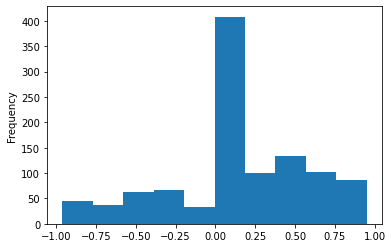

In [413]:
events['VaderSentiment'].plot.hist()
plt.show()

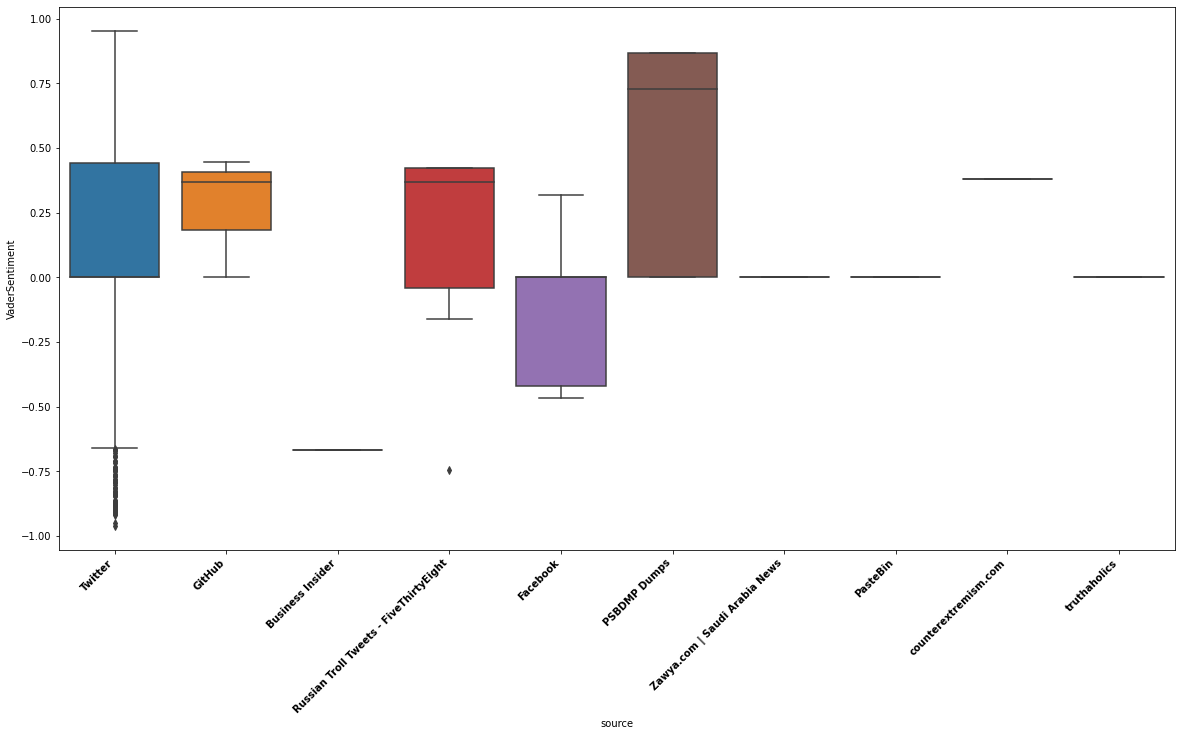

In [414]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x ='source', y= 'VaderSentiment', data=events)
plt.setp(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right', 
    fontweight='heavy'
);

In [415]:
#.4 may need to be adjusted - not completly 
events[events['VaderSentiment'] > .4]['event_fragment']

2       #Malaysia: Trading #opportunity for Digi with ...
7       #Malaysia's #takaful segment will benefit from...
9       #SDG financing gap in Islamic countries an 'op...
12      IBFIM Public Programmes - January 2020! For de...
18      Dear Adab Solutions community! https://t.co/NH...
                              ...                        
1204    Clashes btw Danes & Moslems in the 2nd largest...
1211    For more information regarding Sarwari Qadri O...
1212    @insafpk @aamirliaquat @smqureshipti #Islam #s...
1217    @OpIndia_com According to #shariah nothing wro...
1218    Our team of experts offers a concierge approac...
Name: event_fragment, Length: 300, dtype: object

In [416]:
events[events['VaderSentiment'] > .4]['event_fragment'].count()

300

In [417]:
events[events['VaderSentiment'] < -.25]['event_fragment']

14      Last session risk management in Islamic financ...
27      #SoniaSena won't question #Church conversion u...
30      Some people are ashamed & afraid that kuffar w...
33      You will not find a single text or order from ...
34      @WMPolice It's a shame you dont have real dete...
                              ...                        
1192    @POTUS @VP @KellyannePolls Banning #Shariah la...
1201    #Sharia #Shariah #ISIS #ISIL #ishra Religion o...
1205    @IAmErAijaz Bhai pls ban Tripple talaq, it's r...
1210    Where are you @theresa_may @TheresaMayPM? Why ...
1219    @wasimakramlive #kartarpurcorridorforpeace #gu...
Name: event_fragment, Length: 197, dtype: object

In [418]:
events[events['VaderSentiment'] < -.25]['event_fragment'].count()

197

In [419]:
fig = px.scatter(events, x='published', y='VaderSentiment', color="source", hover_name = 'document_id', hover_data= ['show_text', 'published', 'source'])
#fig.update_traces(marker_size=10)
fig.update_layout(showlegend=True, yaxis = dict( tickfont = dict(size=8)))
fig.show()	

In [420]:
events.VaderSentiment.describe()

count    1073.000000
mean        0.111596
std         0.430798
min        -0.960100
25%         0.000000
50%         0.000000
75%         0.440400
max         0.950100
Name: VaderSentiment, dtype: float64

In [421]:
#Center around mean (.11)
#fig = px.scatter(events[(events['VaderSentiment'] > .11+.43) |(events['VaderSentiment'] < .11-.43) ], x='published', y='VaderSentiment', color="source", 
                #hover_name = 'document_id', hover_data= ['show_text', 'published', 'source'])

fig = px.scatter(events[(events['VaderSentiment']-events['VaderSentiment'].mean()).abs() > events['VaderSentiment'].std() ], x='published', y='VaderSentiment', color="source", 
                hover_name = 'document_id', hover_data= ['show_text', 'published', 'source'])
#fig.update_traces(marker_size=10)
fig.update_layout(showlegend=True, yaxis = dict( tickfont = dict(size=8)))
fig.show()

# Load Persian Translations

In [422]:
#for persian - use the translated fragment column in sentiment scores.

df_persian = pd.read_csv('/home/1501273330/examplenotebooks/Sharia_Teri/Persian_translated_chunks/Persian_translated_fragments.csv')

In [423]:
df_persian.head(10)

Unnamed: 0                                             t_frag  \
0           0  <i id = gympwobkmnq> rt <e id = qachbz> @ baha...   
1           1  <i id = gympwobkmnq> rt <e id = qachbz> @ baha...   
2           2  <i id = gymgdaahbco> Long-term hunger strike c...   
3           3  <i id = gymgdaahbco> Long-term hunger strike c...   
4           4  <i id = gfy5atc_qmm> / speech from <e id = jfj...   
5           5  <i id = gfy5atc_qmm> / speech from <e id = jfj...   
6           6  <i id = gyn3ggbie9e> Intestinal obstruction an...   
7           7  <i id = gyn3ggbie9e> Intestinal obstruction an...   
8           8  <i id = gvlwjaaxlrd> <e id = jClbbk> Ali Shari...   
9           9  <i id = gvlwjaaxlrd> <e id = jClbbk> Ali Shari...   

                                   tagged_fragment_x  \
0  <i id=GYMPWOBKMnq>RT <e id=QacHBz>@baharazadi6...   
1                                                NaN   
2  <i id=GYMGdAAhBco>اعتصاب غذای طولانی مدت باعث ...   
3                                                NaN   
4                                                NaN   
5  <i id=GfY5atC_QmM>/ گفتاری از <e id=JFJF8G>دکت...   
6                                                NaN   
7  <i id=GYN3gGBIE9e>انسداد روده و تنگی نفس <e id...   
8                                                NaN   
9  <i id=GVLWJaAXLrd><e id=JcLBBk>علی شریعتی</e> ...   

                                      cleaned_t_frag  \
0   rt  @ baharazadi63 :  # Prisoner_  # Ali_ fre...   
1   rt  @ baharazadi63 :  # Prisoner_  # Ali_ fre...   
2   Long-term hunger strike causes "kidney pain, ...   
3   Long-term hunger strike causes "kidney pain, ...   
4           / speech from  doctor   Ali Shariati .     
5           / speech from  doctor   Ali Shariati .     
6   Intestinal obstruction and shortness of breat...   
7   Intestinal obstruction and shortness of breat...   
8    Ali Shariati  Beautifully interpreted "Relig...   
9    Ali Shariati  Beautifully interpreted "Relig...   

                             cleaned_tagged_fragment  \
0  RT @baharazadi63: #زندانی_سیاسی #علی_شریعتی آز...   
1  اعتصاب غذای طولانی مدت باعث «درد کلیه، تنگی نف...   
2                       / گفتاری از دکتر علی شریعتی.   
3  انسداد روده و تنگی نفس علی شریعتی درهفتاد و یک...   
4  علی شریعتی به زیبایی تعبیر «مذهب علیه مذهب» را...   
5  همینطورکه از #علی_شریعتی مینویسیم فراموش نکنیم...   
6  همچنین پدرم و مادرم از شاگردان دکتر علی شریعتی...   
7  RT @madyar: اعتصاب غذا وحید صیادى ۴۷ روز آرش ص...   
8  علی شریعتی فعال سیاسی در14همین روز اعتصاب غذای...   
9  شاید این است دلیل تنهایی ما «دکتر علی شریعتی» ...   

                                   tagged_fragment_y  \
0  <i id=GYMPWOBKMnq>RT <e id=QacHBz>@baharazadi6...   
1  <i id=GYMGdAAhBco>اعتصاب غذای طولانی مدت باعث ...   
2  <i id=GfY5atC_QmM>/ گفتاری از <e id=JFJF8G>دکت...   
3  <i id=GYN3gGBIE9e>انسداد روده و تنگی نفس <e id...   
4  <i id=GVLWJaAXLrd><e id=JcLBBk>علی شریعتی</e> ...   
5  <i id=GYK7-qA1oZ6>همینطورکه از <e id=MPtpGk>#ع...   
6  <i id=GYUWckAjePL>همچنین پدرم و مادرم از شاگرد...   
7  <i id=GYA7_WAuOto>RT <e id=KFUHqY>@madyar</e>:...   
8  <i id=GX7DFfA8MwR><e id=JcLBBk>علی شریعتی</e> ...   
9  <i id=Ge7rL1FHSE0>شاید این است دلیل تنهایی ما ...   

                                     tagged_fragment  
0  <i id=GYMPWOBKMnq>RT <e id=QacHBz>@baharazadi6...  
1  <i id=GYMGdAAhBco>اعتصاب غذای طولانی مدت باعث ...  
2  <i id=GfY5atC_QmM>/ گفتاری از <e id=JFJF8G>دکت...  
3  <i id=GYN3gGBIE9e>انسداد روده و تنگی نفس <e id...  
4  <i id=GVLWJaAXLrd><e id=JcLBBk>علی شریعتی</e> ...  
5  <i id=GYK7-qA1oZ6>همینطورکه از <e id=MPtpGk>#ع...  
6  <i id=GYUWckAjePL>همچنین پدرم و مادرم از شاگرد...  
7  <i id=GYA7_WAuOto>RT <e id=KFUHqY>@madyar</e>:...  
8  <i id=GX7DFfA8MwR><e id=JcLBBk>علی شریعتی</e> ...  
9  <i id=Ge7rL1FHSE0>شاید این است دلیل تنهایی ما ...

In [424]:
df_persian.shape

(10000, 7)

In [425]:
df_persian.loc[2, 'cleaned_t_frag']

' Long-term hunger strike causes "kidney pain, shortness of breath, general weakness and increased blood concentration"  Ali Shariati .  '

In [426]:
df_persian.loc[2, 'cleaned_tagged_fragment']

'/ گفتاری از دکتر علی شریعتی.'

In [427]:
#df_persian_titles = pd.read_csv('/home/1501273330/examplenotebooks/Sharia_Teri/Persian_translated_titles.csv')

In [428]:
#df_persian_titles.head()

In [429]:
#ls

In [430]:
#Then aggregate scores across the 3 languges - show vadersentiment score on a time series graph. (or maybe stacked )
arabic_events

Unnamed: 0 document_id published_date  \
0             0      hLkGAU     2021-02-06   
1             1      X0t8n_     2018-10-20   
2             2      YWzz9T     2018-12-01   
3             3      VM6F-v     2018-02-05   
4             4      as-fCA     2019-07-19   
..          ...         ...            ...   
308         308      cPYKKx     2019-12-20   
309         309      fdwY0-     2020-09-27   
310         310      agmSG9     2019-06-28   
311         311      VAPSJp     2018-01-10   
312         312      TzA4T2     2017-08-06   

                                        document_title  \
0    سخنرانی مولوی عبدالحمید در خطبه‌های نماز جمعه ...   
1    کار ترامپ با پیروزی دمکرات ها در انتخابات تمام...   
2       زنی که در باره ازدواج مجدد مردان تصمیم می‌گیرد   
3    ماده 6 از#مریم_رجوی:ايران فردا،كشور عدالت و قا...   
4    @Katayoon شما ها دشمن امریکایید ترامپ باید بمو...   
..                                                 ...   
308                      Qanoon E Shariat قانون شریعت‎   
309              گفتمان جهادی/انقلابی، واقعیتی بی مبنا   
310  6. ایران فردا، كشور عدالت و قانون است. ما خواه...   
311          اجرای احکام اسلامی در یونان محدود می‌شود!   
312  هشدار «هنری کیسینجر» درباره ظهور امپراطوری ایر...   

                                               t_title  \
0    Rumi Abdulhamid's speech in the sermons of Fri...   
1    Tramp's work with the victory of democrats in ...   
2            The woman who decides on the rest of men    
3    Article 6 of Maryam: Iran Tomorrow is the coun...   
4                         @Katayoon You are the enemy    
..                                                 ...   
308                       Qanoon E Shariat Law Sharia    
309  Jihad / Revolutionary Discourse, an unaffordab...   
310  6. Iran tomorrow is justice and law. We want t...   
311  The implementation of Islamic rulings in Greec...   
312  Henry Kissinger's warning about the emergence ...   

                                              fragment  \
0    کسی که مرتکب قتل شده باید قصاص شود و این قانون...   
1    او در تبلیغاتش در کانزاس و اوکلاهاما مدعی شده ...   
2    سخنگوی این گروه، مجیده هاشم، می‌گوید: «چهارٰچو...   
3    ماده 6 از#مریم_رجوی:ایران فردا،کشور عدالت و قا...   
4    @Katayoon شما‌ها دشمن امریکایید ترامپ باید بمو...   
..                                                 ...   
308                      Qanoon E Shariat قانون شریعت.   
309  این گفتمان که حاکمیت خدا و قانون شریعت را ضرور...   
310  6. ایران فردا، كشور عدالت و قانون است. ما خواه...   
311  بر اساس پیمان 1923 لوزان که پس از شکست یونان د...   
312  وی در این زمینه اظهار داشت: «در سراسر عراق و س...   

                                                t_frag  \
0    The one who committed murder must be retaliate...   
1    In his advertising in Kansas and Oklahoma, he ...   
2    "The framework of the Shari'a law in Malaysia ...   
3    Article 6 of Maryam: Iran is tomorrow, the cou...   
4                            @Katayoon You Americans.    
..                                                 ...   
308                      Qanoon E Shariat Law Sharia.    
309  This discourse, which implies the sovereignty ...   
310  6. Iran tomorrow is justice and law. We want t...   
311  According to the 1923 Turkish treaty after the...   
312  "Throughout Iraq and Syria, ISIS has announced...   

                                              entities  \
0                               {"Religion":["Islam"]}   
1    {"GeoEntity":["Kānzās","Ovklāhāmā"],"Religion"...   
2     {"Country":["Malaysia"],"Person":["مجیده هاشم"]}   
3    {"Country":["Iran"],"Person":["شریعت آخوندی"],...   
4    {"Username":["@Katayoon"],"Person":["Donald Jo...   
..                                                 ...   
308                                                NaN   
309                                                NaN   
310  {"City":["Deh Khwāhān","Dsht"],"Country":["Ira...   
311  {"Country":["Greece","Turkey"],"GeoEntity":["ت...   
312  {"Organization":["Isl

<AxesSubplot:>

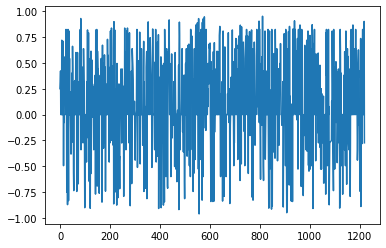

In [431]:
events.VaderSentiment.plot()

In [432]:
#use Vader pre-trained model to analyze translated Arabic data-points
#this is correct
analyzer = SentimentIntensityAnalyzer()
arabic_events['scores'] = arabic_events['t_frag'].apply(lambda x: analyzer.polarity_scores(x))

In [433]:
arabic_events['VaderSentiment'] = arabic_events['scores'].apply(lambda x: x['compound'])
arabic_events['VaderSentiment.positive'] = arabic_events['scores'].apply(lambda x: x['pos'])
arabic_events['VaderSentiment.negative'] = arabic_events['scores'].apply(lambda x: x['neg'])

<AxesSubplot:>

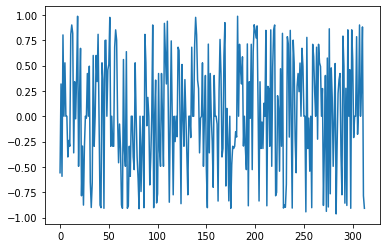

In [434]:
arabic_events.VaderSentiment.plot()

In [435]:
#use Vader pre-trained model to analyze translated Arabic data-points
#this is correct
analyzer = SentimentIntensityAnalyzer()
df_persian['scores'] = df_persian['cleaned_t_frag'].apply(lambda x: analyzer.polarity_scores(x))

In [436]:
df_persian['VaderSentiment'] = df_persian['scores'].apply(lambda x: x['compound'])
df_persian['VaderSentiment.positive'] = df_persian['scores'].apply(lambda x: x['pos'])
df_persian['VaderSentiment.negative'] = df_persian['scores'].apply(lambda x: x['neg'])

<AxesSubplot:>

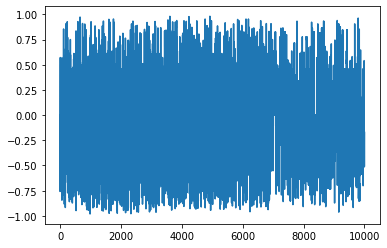

In [437]:
df_persian.VaderSentiment.plot()

In [438]:
fig = px.scatter(arabic_events[(arabic_events['VaderSentiment']-arabic_events['VaderSentiment'].mean()).abs() > arabic_events['VaderSentiment'].std() ], x='published_date', y='VaderSentiment')
#fig.update_traces(marker_size=10)
fig.update_layout(showlegend=True, yaxis = dict( tickfont = dict(size=8)))
fig.show()

In [439]:
arabic_events['VaderSentiment'].std()

0.5589666847359251

In [440]:
arabic_events['published'] = arabic_events['published_date']

In [441]:
combined_event_scores = pd.concat([events[['published','VaderSentiment']],arabic_events[['published','VaderSentiment']]])

In [442]:
combined_event_scores['language'] = ['English']*events.shape[0]+['Arabic']*arabic_events.shape[0]

In [443]:
fig = px.scatter(combined_event_scores, x='published', y='VaderSentiment',color = 'language', opacity = .2) #add opacity to see overlaps
#fig.update_traces(marker_size=10)
fig.update_layout(showlegend=True, yaxis = dict( tickfont = dict(size=8)))
fig.show()

In [444]:
events.shape[0] #english

1073

In [445]:
arabic_events.shape[0] #arabic

313

In [ ]:
fig = px.scatter(events.sort_values('published'), x='published', y='VaderSentiment', title = 'English Sentiment') #add opacity to see overlaps
#fig.update_traces(marker_size=10)
#fig.update_layout(showlegend=False, yaxis = dict( tickfont = dict(size=8)))
fig.show()

In [ ]:
fig = px.scatter(arabic_events.sort_values('published'), x='published', y='VaderSentiment',title = 'Arabic Sentiment') #add opacity to see overlaps
#fig.update_traces(marker_size=10)
fig.update_layout(showlegend=False, yaxis = dict( tickfont = dict(size=8)))
fig.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=1)

fig.add_trace(
    px.line(events.sort_values('published')[events.sort_values('published').published < '2018-01-01'], x='published', y='VaderSentiment').data[0],
    row=1,col = 1
)

fig.add_trace(
    px.line( events.sort_values('published')[('2018-01-01' < events.sort_values('published').published) & ( events.sort_values('published').published < '2019-01-01')], x='published', y='VaderSentiment').data[0],
    row=2,col = 1
)

fig.add_trace(
    px.line(events.sort_values('published')[('2019-01-01' < events.sort_values('published').published) & ( events.sort_values('published').published < '2020-01-01')], x='published', y='VaderSentiment').data[0],
    row=3,col = 1
)

fig.add_trace(
    px.line(events.sort_values('published')[('2020-01-01' < events.sort_values('published').published) & ( events.sort_values('published').published < '2021-01-01')], x='published', y='VaderSentiment').data[0],
    row=4,col = 1
)

fig.update_layout(height=1300, width=1000, title_text="Yearly English Sentiment")

fig.show()
#px.line(events.sort_values('published')[events.sort_values('published').published < '2018-01-01'], x='published', y='VaderSentiment', title = '2017 English Sentiment',ax = ax1)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=1)

fig.add_trace(
    px.line(arabic_events.sort_values('published')[arabic_events.sort_values('published').published < '2018-01-01'], x='published', y='VaderSentiment').data[0],
    row=1,col = 1
)

fig.add_trace(
    px.line( arabic_events.sort_values('published')[('2018-01-01' < arabic_events.sort_values('published').published) & ( arabic_events.sort_values('published').published < '2019-01-01')], x='published', y='VaderSentiment').data[0],
    row=2,col = 1
)

fig.add_trace(
    px.line(arabic_events.sort_values('published')[('2019-01-01' < arabic_events.sort_values('published').published) & ( arabic_events.sort_values('published').published < '2020-01-01')], x='published', y='VaderSentiment').data[0],
    row=3,col = 1
)

fig.add_trace(
    px.line(arabic_events.sort_values('published')[('2020-01-01' < arabic_events.sort_values('published').published) & ( arabic_events.sort_values('published').published < '2021-01-01')], x='published', y='VaderSentiment').data[0],
    row=4,col = 1
)

fig.update_layout(height=1300, width=1000, title_text="Yearly Arabic Sentiment")

fig.show()
#px.line(arabic_events.sort_values('published')[arabic_events.sort_values('published').published < '2018-01-01'], x='published', y='VaderSentiment', title = '2017 English Sentiment',ax = ax1)